# Capstone Project

## Hybrid-based Machine Learning techniques in Bank Account Classification

# Introduction

- Bank account ownership refers to the possession and active use of a formal financial account such as a savings or current account offered by a commercial bank or other regulated financial institution (Aquila et al.,2016).
- It enables individuals to safely save money, access credit, make payments, and participate in the formal financial system.
-  Widespread bank account ownership enhances financial inclusion, empowering people to invest in education, health, and business opportunities (Nandru et al., 2016).
-  Financial inclusion is essential for promoting economic growth and financial awareness in East Africa. Despite progress, a significant portion of the population remains unbanked or underbanked (Wokabi, 2018).
-  Machine learning techniques uncover hidden patterns in socioeconomic data to predict who is likely to own or use a bank account. Hybrid and ensemble algorithms often outperform single models by combining strengths of different learning methods (Kayit & Ismail, 2025).

# Problem Statement

- In East Africa, the financial sector has made significant progress towards financial inclusion, encouraging individuals to embrace technological advancements in the financial sector like owning a bank account. However, most of the population in the region do not own bank accounts despite the efforts, but rather prefer the traditional means of managing their income.
- Determining the factors that contributes to an individual either owning a bank account or not is crucial, as this will enable the financial sector, specifically banks to craft certain solutions that could draw these individuals into the financial system, and thus be bank account holders.
- Single machine learning models struggle to capture complex, nonlinear relationships among socioeconomic, demographic, and geographic factors influencing financial inclusion. They often overfit or underfit, perform poorly on imbalanced data, and fail to detect variable interactions, limiting their predictive power. 
- There is a need to evaluate hybrid machine learning models that combine multiple algorithms to enhance accuracy, robustness, and interpretability in predicting bank account usage across East Africa.

# Objectives of Study

1. To determine key factors influencing individual bank account ownership.
2. To compare the predictive power of hybrid ML models to single ML models.
    

# Significance of the Study

1. Supports policymakers and financial institutions in targeting unbanked population.
2. Demonstrates the potential of hybrid ML methods (e.g., stacking, blending, and ensemble) in real-world financial inclusion problems.
3. Contributes to the growing literature on applying data-driven methods to socioeconomic challenges in East Africa

# Methodology

#### Data Source and Data Understanding

The dataset was sourced from Zindi Platform. It contains both numeric and categorical features.The variables includes;
- bank_account(Target/response)- This is a binary variable with Yes if the interviwee has formal bank account and No of the participant has no bank account.
- country- This shows the country of the participants of the survey(Kenya, Uganda, Tanzania and Rwanda).
- year- This is the year when the survey was done.
- uniqueid- The unique identifier for the participants.
- location_type- This is a categorical feature with two categories(Rural and urban) showing the location of the survey participants.
- cellphone_access- Categorical feature with two categories (Yes and No) showing if the participant has access to cellphone.
- household_size- Numeric variable which shows the number of people living in one house.
- age_of_respondent- Numeric variable, age of the participant.
- relationship_with_head- categorical variable(Spouse, Head of Household, Other relative, Child, Parent,
 other, non-relatives) showing the relationship of the participant with the head of the family.
- gender_of_respondent- gender of the participants which is categorical(Female or Male).
- marital_status- marital status of the participants, categorical in nature(Married/Living together, Widowed, Single/Never Married,
 Divorced/Seperated, Dont know).
- education_level- highest education form of the respondent which is categorical (Secondary education, No formal education,
 Vocational/Specialised training, Primary education,Tertiary education,Other/Dont know/RTA).
- job_type- the job of the participant which is categorical(Self employed, Government Dependent, Formally employed Private,
 Informally employed, Formally employed Government, Farming and Fishing, Remittance Dependent, Other Income, Don't Know/Refuse to answer, No Income)

#### Exploratory Data Analysis and Data Preprocessing 

- Before the actual modeling, Checking for missing values and duplicates was done.
- We check the summary of both the numerical and categorical varibles using basic summary statistics such as the mean, minimum and maximum and percentages.
- Also to enhance the exploration, data visualisation was done accordingly.
- As one of the preprocessing activities, we will perform encoding i.e. both label encoding for ordinal variables and One Hot Encoding for nominal variables and feature engineering.

#### Hybrid SVM – XGBoost algorithms

- A hybrid SVM and XGBoost model combines the strengths of both algorithms to improve predictive performance, especially in complex classification problems. SVM is powerful for finding optimal decision boundaries in high-dimensional spaces using kernel functions, while XGBoost is an advanced gradient boosting algorithm that excels at capturing nonlinear relationships, handling missing values, and reducing bias through sequential tree learning. In a hybrid approach, the models are typically integrated in two ways.
  

#### Hybrid RF – Logistic Regression

- A hybrid Random Forest (RF)–Logistic Regression (LR) model combines the interpretability and probabilistic strength of logistic regression with the nonlinear learning capability of Random Forests.
- RF is an ensemble of decision trees that captures complex interactions, nonlinear relationships, and variable importance through bagging, while logistic regression remains a simple, transparent linear classifier that models the log-odds of an event. 

#### Model Evaluation

- The evaluation metrics such as ROC-AUC and Accuracy Score will be used to evaluate best model.
  

## Loading The Data

In [1]:
# setting working directory
#import os; os.chdir('C:\\Users\\Administrator\\Desktop\\Ngao')
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# importing the necessary library
import pandas as pd
# loading the data
train_df = pd.read_csv('C:/Users/USER/Downloads/NGAO LABS/PYTHON PROJECTS - NGAO LABS/Train.csv')


## Data Exploration

In [2]:
# Viewing the first five rows
display(train_df.head())

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [3]:
#Structure of the dataset
display(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


None

- The output above shows the structure of the dataset. There are 13 variables of which three of them (year, household_size and age of respondent) are numerical while 10 are categorical variables.
- The sample size is 23524 because there is no missing values as shown by "non-null".

#### Checking for missing values

In [4]:
# Check for missing values
display("Missing values per column:")
display(train_df.isnull().sum())

'Missing values per column:'

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

- There is no missing values in all the rows and columns.
- Therefore there is no need for imputation and dropping.

#### Checking for Duplicates

In [5]:
train_df.duplicated().sum()

np.int64(0)

- No duplicates from the dataset

#### Descriptive statistics

In [6]:
# Summary statistics for numerical variables
print("Summary Statistics for Numerical Variables:")
numerical_summary = train_df.describe().T
numerical_summary

Summary Statistics for Numerical Variables:


,count,mean,std,min,25%,50%,75%,max
year,23524.0,2016.975939,0.847371,2016.0,2016.0,2017.0,2018.0,2018.0
household_size,23524.0,3.797483,2.227613,1.0,2.0,3.0,5.0,21.0
age_of_respondent,23524.0,38.805220,16.520569,16.0,26.0,35.0,49.0,100.0


- The average household size is about 4 people (mean = 3.80).Most households fall between 2 and 5 members, showing a typical small–medium family size.The minimum household size is 1, indicating some respondents live alone. The maximum size is 21, which is unusually large and may represent extended families.The spread (std = 2.23) shows moderate variation, meaning household sizes differ but not extremely for most cases.The median (3) suggests half of households have 3 or fewer members, while the other half have more.
- The average age is about 39 years, indicating most respondents are middle-aged adults. Ages range widely from 16 to 100 years, showing diverse representation. The middle 50% of respondents are aged 26 to 49, indicating most are within working/active age brackets. The distribution shows both younger and older respondents, giving a balanced age spread.The high standard deviation (16.5) indicates significant variability in age.The median age (35) shows that half of the participants are aged 35 or younger.
- For the year, this implies that the survey was conducted between 2016 and 2018.

#### Summary Of the Categorical Variables

In [7]:
for col in train_df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    summary = train_df[col].value_counts(normalize=True).mul(100).round(2).to_frame('Percentage')
    summary['Count'] = train_df[col].value_counts()
    print(summary)



Column: country
          Percentage  Count
country                    
Rwanda         37.13   8735
Tanzania       28.14   6620
Kenya          25.79   6068
Uganda          8.93   2101

Column: uniqueid
               Percentage  Count
uniqueid                        
uniqueid_17          0.02      4
uniqueid_16          0.02      4
uniqueid_18          0.02      4
uniqueid_2           0.02      4
uniqueid_3           0.02      4
...                   ...    ...
uniqueid_8743        0.00      1
uniqueid_8741        0.00      1
uniqueid_8740        0.00      1
uniqueid_8738        0.00      1
uniqueid_8734        0.00      1

[8735 rows x 2 columns]

Column: bank_account
              Percentage  Count
bank_account                   
No                 85.92  20212
Yes                14.08   3312

Column: location_type
               Percentage  Count
location_type                   
Rural               60.97  14343
Urban               39.03   9181

Column: cellphone_access
            

In [8]:
stats = train_df.select_dtypes(include=['object']).describe().T
stats

,count,unique,top,freq
country,23524,4,Rwanda,8735
uniqueid,23524,8735,uniqueid_17,4
bank_account,23524,2,No,20212
location_type,23524,2,Rural,14343
cellphone_access,23524,2,Yes,17454
gender_of_respondent,23524,2,Female,13877
relationship_with_head,23524,6,Head of Household,12831
marital_status,23524,5,Married/Living together,10749
education_level,23524,6,Primary education,12791
job_type,23524,10,Self employed,6437


- Rwanda has the highest proportion of respondents (37.1%), making it the largest contributor to the dataset.Tanzania (28.1%) and Kenya (25.8%) also contribute significantly and nearly equally. Uganda has the smallest representation (8.9%).Overall, the dataset is dominated by Rwanda, Tanzania, and Kenya.
- Most respondents do not own a bank account (85.9%). Only 14.1% have a bank account, showing low financial inclusion across the four countries.
- Majority of respondents live in rural areas (61%). Urban residents make up 39%. Rural dominance may reflect limited access to urban financial infrastructure.
- Majority (74.2%) have access to a cellphone. A quarter (25.8%) do not have cellphone access. This suggests that mobile-based financial services have strong potential reach.
- Females form the majority (59%). Males account for 41% of respondents. Female-dominant dataset, likely due to household survey participation patterns.
- More than half (54.5%) are the household heads themselves. Spouses form the second largest group (27.7%). Children are 9.5%, while parents and other relatives contribute smaller part. Very few (0.8%) are non-relatives in the household.
- About 45.7% are married or living together—most common group. 33.9% are single and have never married. Widowed respondents make up 11.5%, while 8.8% are divorced or separated. Very few (0.03%) reported “Don’t know.”
- Over half (54.4%) have primary education, the dominant group. 19.2% have no formal education at all. 18% completed secondary school. Tertiary education (4.9%) and vocational training (3.4%) are very low. This indicates generally low educational attainment in the sample.
- The largest group is self-employed (27.4%). Informal employment (23.8%) and farming/fishing (23.1%) are also major categories. Households dependent on remittances form 10.7%. Formal employment (private + government) together account for ~6%, showing low formal sector participation. A small portion (2.7%) have no income. Only 0.5% refused to answer or didn’t know.

#### Data Visualisation

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set style
#sns.set(style="whitegrid")

bank_account    No   Yes
country                 
Kenya         4547  1521
Rwanda        7732  1003
Tanzania      6013   607
Uganda        1920   181


<Figure size 1200x800 with 0 Axes>

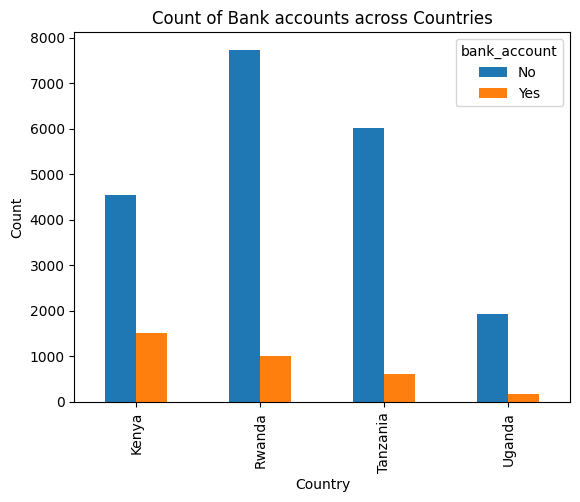

In [10]:
country_bank_account = pd.DataFrame(pd.crosstab(train_df['country'], train_df['bank_account']))
print(country_bank_account)

plt.figure(figsize=(12,8))
country_bank_account.plot(kind='bar', legend=True)
plt.title('Count of Bank accounts across Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


- Across the four countries, individuals without formal bank accounts consistently outnumber those who are banked. Rwanda has the highest proportion of unbanked people, followed by Tanzania, then Kenya, and lastly Uganda, reflecting varying levels of financial inclusion across the region.
- Kenya has the highest number of individuals with bank accounts among the four countries, demonstrating relatively stronger financial inclusion. It is followed by Rwanda, then Tanzania, and finally Uganda, which has the lowest share of banked individuals.

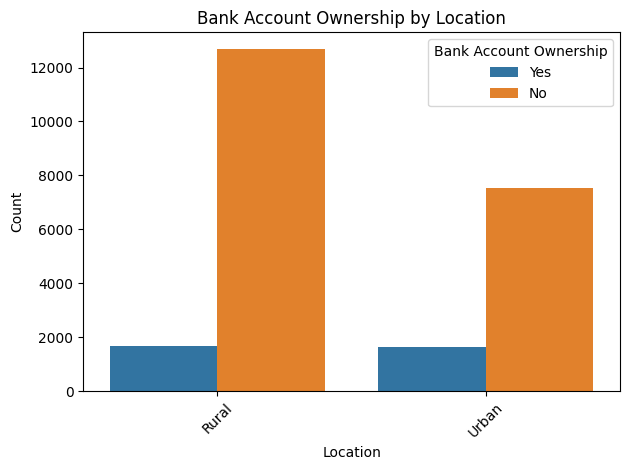

In [11]:
# Location type
sns.countplot(
    data=train_df,
    x="location_type",
    hue="bank_account"
)

plt.title("Bank Account Ownership by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Bank Account Ownership")
plt.tight_layout()
plt.show()

- Among the rural residence, most of the people do not have bank accounts while a few have bank accounts. This might be attributed to limited access to banks in rural areas or financial unawareness.
- The urban dwellers also have higher number of non-owners of bank accaounts, this can be attributed to the fact that most people doesn't have formal jobs, that is, they might be managing their income using mobile money platforms.

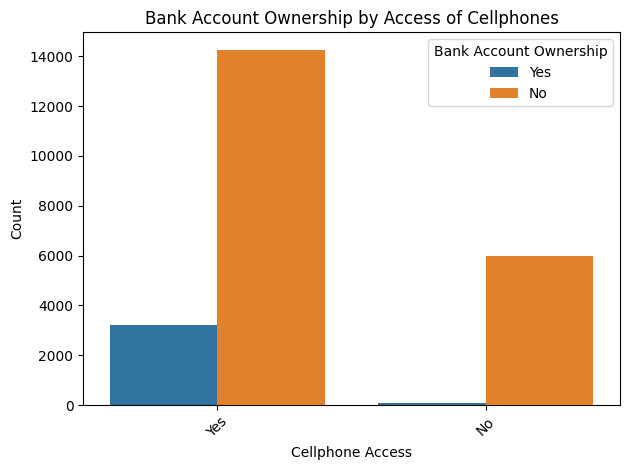

In [12]:
# Cellphone access
sns.countplot(
    data=train_df,
    x="cellphone_access",
    hue="bank_account"
)

plt.title("Bank Account Ownership by Access of Cellphones")
plt.xlabel("Cellphone Access")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Bank Account Ownership")
plt.tight_layout()
plt.show()

- It is very evident that access to any cellphone has a significant impact on bank account ownership.
- Individuals who have access to a cellphone are far more likely to own a bank account compared to those without access.
- Despite this, in both categories, individuals without bank accounts still constitute a larger proportion. This may be explained by the widespread use of mobile money services such as M-Pesa, which reduce the immediate need for formal bank accounts.

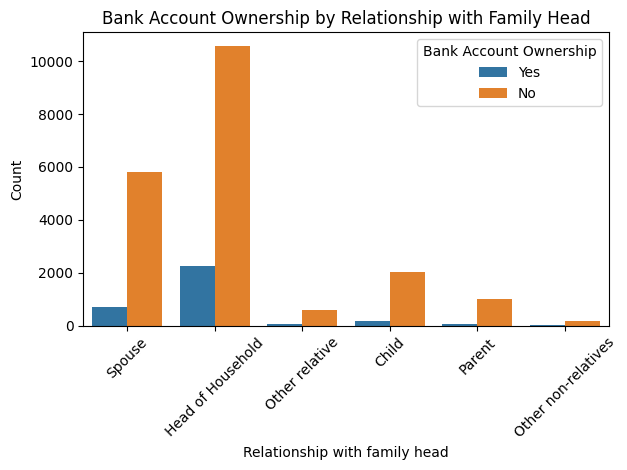

In [13]:
# Relationship with family head
sns.countplot(
    data=train_df,
    x="relationship_with_head",
    hue="bank_account"
)

plt.title("Bank Account Ownership by Relationship with Family Head")
plt.xlabel("Relationship with family head")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Bank Account Ownership")
plt.tight_layout()
plt.show()

- The heads of households, their spouses, and children are more likely to have bank accounts compared to parents and other relatives living in the same home. This can be attributed to the fact that primary decision-makers and immediate dependents often handle day to day financial responsibilities such as paying bills, receiving salaries, or managing household expenses.
- Financial institutions typically target these groups because they are more economically active and present higher potential for consistent banking transactions, savings, and uptake of financial products.

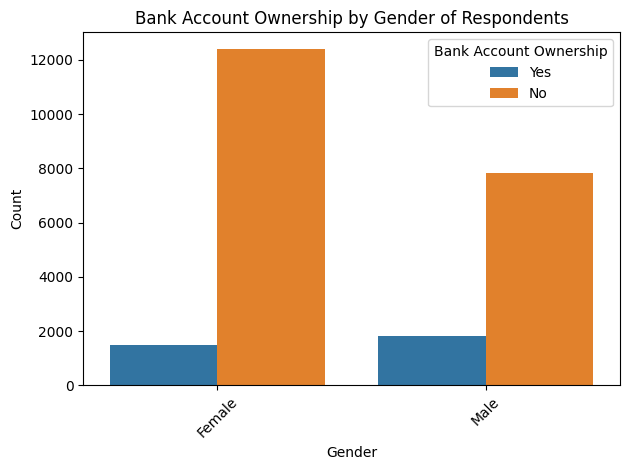

In [14]:
#Gender of the respondents
sns.countplot(
    data=train_df,
    x="gender_of_respondent",
    hue="bank_account"
)

plt.title("Bank Account Ownership by Gender of Respondents")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Bank Account Ownership")
plt.tight_layout()
plt.show()

- Men are likely to have bank accounts than women, this because they often have higher participation in formal employment, which increases the likelihood of needing a bank account for salary deposits. This greater economic activity naturally leads to higher account ownership compared to females
- Also, In many communities, men traditionally handle major financial decisions, giving them more exposure to banks and financial services. As a result, they are more likely to open and maintain bank accounts.
- However, in both male and female categories, individuals without bank accounts still outnumber those who have them. This suggests that broader structural barriers such as limited financial access, costs, or reliance on mobile money affect both genders regardless of their differences in account ownership.

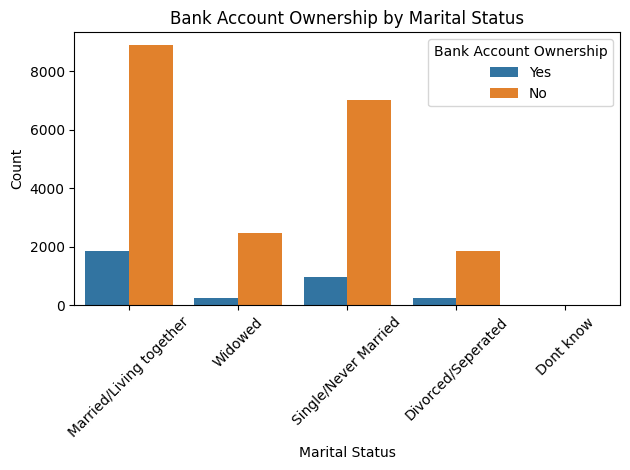

In [15]:
# Marital Status
sns.countplot(
    data=train_df,
    x="marital_status",
    hue="bank_account"
)

plt.title("Bank Account Ownership by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Bank Account Ownership")
plt.tight_layout()
plt.show()

- Bank account ownership is highest among married individuals, followed by singles, divorced, and widowed persons. This trend may be due to married couples typically managing household finances together and facing greater financial responsibilities, which encourages formal banking.
- However, in all these groups, those without bank accounts outnumber those who have, suggesting that factors such as limited access, costs, or reliance on alternative financial services still restrict formal banking.

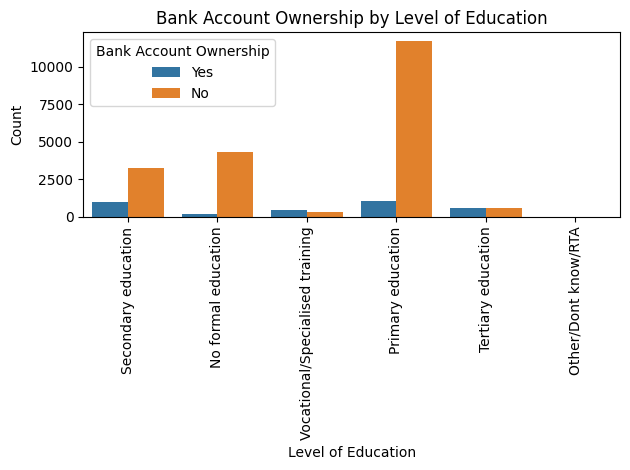

In [16]:
# Education Level
sns.countplot(
    data=train_df,
    x="education_level",
    hue="bank_account"
)

plt.title("Bank Account Ownership by Level of Education")
plt.xlabel("Level of Education")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Bank Account Ownership")
plt.tight_layout()
plt.show()

- There is a slightly higher number of individuals with bank accounts compared to those without among people with tertiary education and those with vocational or specialized training. This may be because higher levels of education often increase financial literacy and awareness of the benefits of formal banking.
- Among individuals with no formal education, primary, or secondary education, those without bank accounts outnumber those who have them. This may be due to lower financial literacy and limited awareness of banking services or lack of formal jobs within these groups.

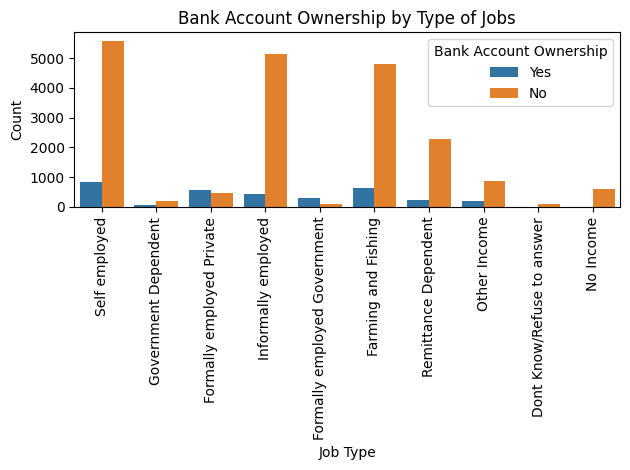

In [17]:
# Job Type
sns.countplot(
    data=train_df,
    x="job_type",
    hue="bank_account"
)

plt.title("Bank Account Ownership by Type of Jobs")
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Bank Account Ownership")
plt.tight_layout()
plt.show()

- Individuals formally employed in the private sector and those employed by the government have higher numbers of bank account ownership compared to those without accounts. This is likely because formal employment often requires salary deposits into bank accounts and provides easier access to financial services.
- Individuals who are self-employed, government dependent, informally employed, engaged in farming or fishing, reliant on remittances, have no income, or earn other forms of income tend to have more people without bank accounts than those with accounts. This may be due to irregular or unpredictable income streams, limited access to formal banking, and lower incentives to open accounts.

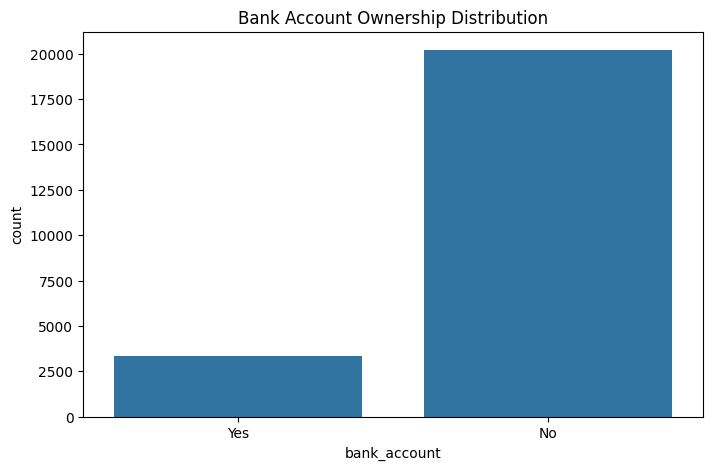

In [18]:
plt.figure(figsize=(8,5))
sns.countplot(data=train_df, x="bank_account")
plt.title("Bank Account Ownership Distribution")
plt.show()

- It is very evident from the dataset that across the four countries, individuals without bank accounts are more than those who have them. This suggests that financial inclusion remains a significant challenge in the region. Limited access to bank branches, especially in rural areas, may prevent many from opening accounts.
- Additionally, high costs of account maintenance, lack of awareness about formal banking services or increase use of mobile money platforms across the region could discourage people from using banks.
- From a business perspective, these gaps highlight opportunities for financial institutions to develop more accessible, affordable, and user friendly banking products to attract those without bank accounts.

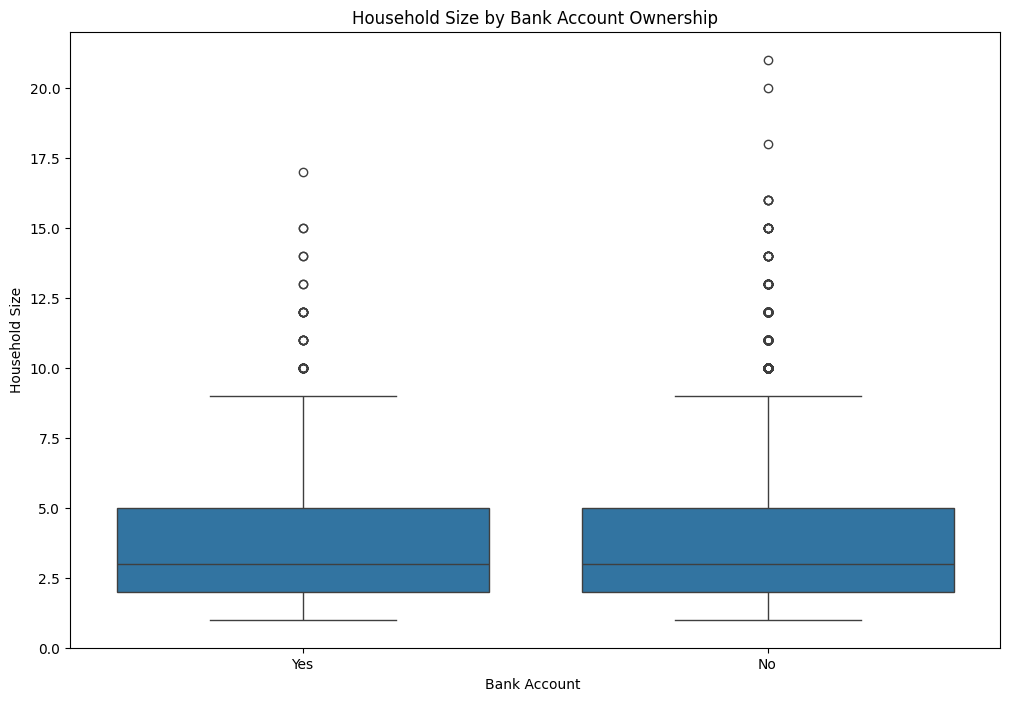

In [12]:
# Numerical Variables
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.boxplot(data=train_df, x='bank_account', y='household_size')
plt.title("Household Size by Bank Account Ownership")
plt.xlabel("Bank Account ")
plt.ylabel("Household Size")
plt.show()



- On average, households, whether banked or unbanked consist of about 4 people, with a minimum of around 2 and a maximum of about 9 members.
- The dots on the plot represent outliers, highlighting households that are unusually large. Identifying these outliers is important, as they may indicate unique financial needs or behaviors that differ from the typical household, which can be valuable for targeted financial services or policy planning.
  

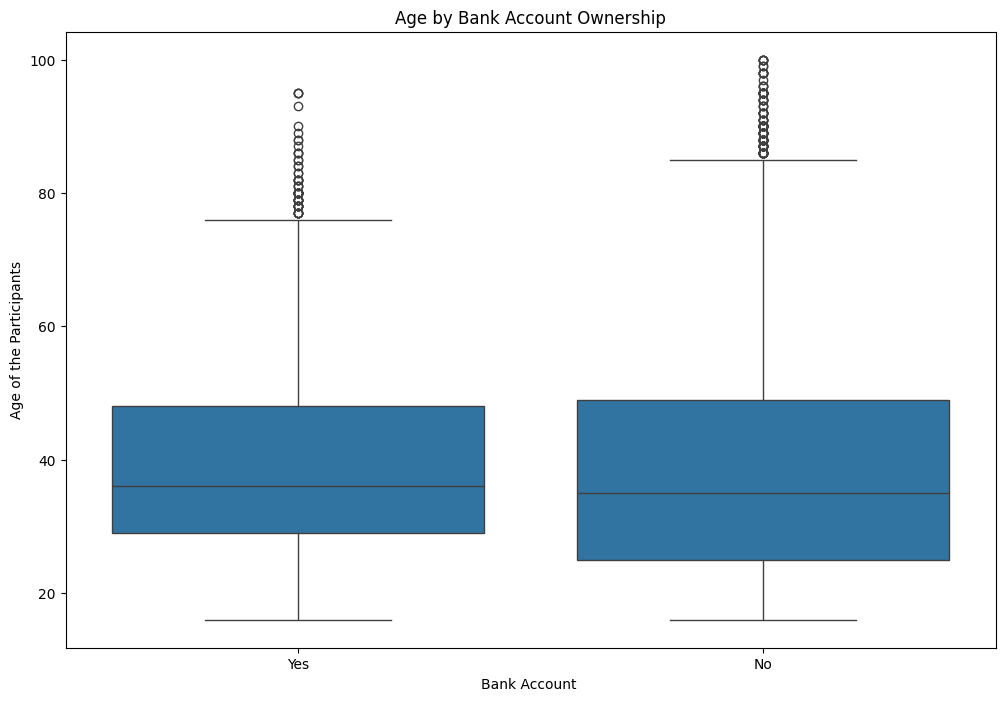

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.boxplot(data=train_df, x='bank_account', y='age_of_respondent')
plt.title("Age by Bank Account Ownership")
plt.xlabel("Bank Account ")
plt.ylabel("Age of the Participants")
plt.show()

- The average age for both banked and unpanked idividuals is about 39 years, indicating most respondents are middle-aged adults.
- Ages range widely from 16 to 100 years, showing diverse representation. The middle 50% of respondents are about aged 26 to 49, indicating most are within working/active age brackets.


### Feature Engineering

#### Encoding the categorical variables using one-hot encoding.

In [15]:
# # Selecting categorical columns to encode, excluding 'uniqueid'
categorical_cols_to_encode = (
    train_df.select_dtypes(include='object')
            .columns
            .drop(['uniqueid', 'year', 'country'], errors='ignore')
)

# One-hot encode and force 0/1 integer values
train_df_encoded = pd.get_dummies(
    train_df,
    columns=categorical_cols_to_encode,
    drop_first=True,
    dtype=int             # ensures dummy variables are 0/1, not True/False
)

# Drop original 'uniqueid'
train_df_encoded = train_df_encoded.drop(['uniqueid', 'year', 'country'], axis=1, errors='ignore')

# Display the encoded dataset
display(train_df_encoded.head())

,household_size,age_of_respondent,bank_account_Yes,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,3,24,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5,70,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,5,26,1,1,1,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,5,34,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,8,26,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#### Multicollinearity Test

- Multicollinearity occurs when two or more predictor variables in a regression model are highly correlated, making it difficult to isolate their individual effects. It inflates the variance of coefficient estimates, which can lead to unstable or misleading results.
- Common ways to detect it include Variance Inflation Factor (VIF) for numeric variables and adjusted Generalized VIF (GVIF) for categorical variables with multiple dummy columns.
- GVIF (Generalized Variance Inflation Factor) measures multicollinearity for variable groups, especially categorical variables with multiple dummy columns, by extending the traditional VIF.
- It works by computing the determinant of the covariance matrix of a variable group relative to the full model, generalizing VIF to multi-column predictors.
- Adjusted GVIF (GVIF^(1/(2*Df))) accounts for the number of degrees of freedom, making values comparable across variables with different Df. Values above 5 typically indicate moderate to high multicollinearity that may need attention (Fox & Monette, 1992).

In [16]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
X = train_df_encoded.drop("bank_account_Yes", axis=1)
groups = {}

for col in X.columns:
    prefix = col.split("_")[0]
    groups.setdefault(prefix, []).append(col)

def compute_gvif(X, groups):

    # Fit a dummy OLS model (dependent variable doesn't matter)
    y_fake = np.random.randn(X.shape[0])
    model = sm.OLS(y_fake, sm.add_constant(X)).fit()

    # Convert to NumPy arrays (important!)
    cov = np.array(model.normalized_cov_params)
    inv_cov = np.linalg.inv(cov)

    results = []

    for group_name, cols in groups.items():

        # Column index positions
        idx = [X.columns.get_loc(c) for c in cols]

        # Extract submatrices USING NumPy
        sub_cov = cov[np.ix_(idx, idx)]
        sub_inv = inv_cov[np.ix_(idx, idx)]

        # GVIF calculation
        gvif = np.linalg.det(sub_cov) * np.linalg.det(sub_inv)
        gvif = gvif ** (1 / (2 * len(idx)))

        results.append([group_name, len(idx), gvif])

    return pd.DataFrame(results, columns=["Variable_Group", "Df", "GVIF"])


#### Visualizing the GVIF values

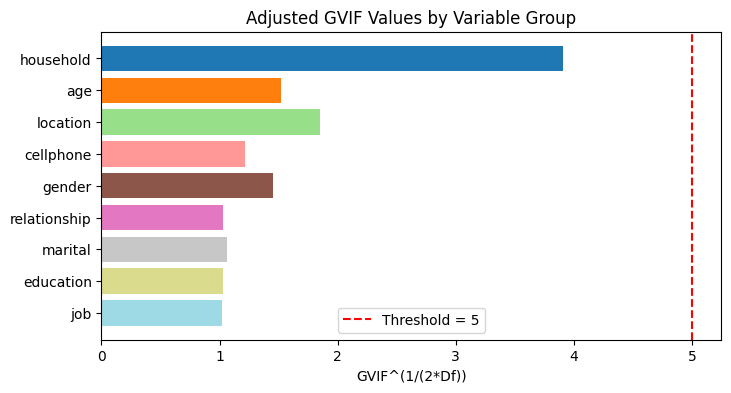

In [17]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
gvif_table = compute_gvif(X, groups)
gvif_table['GVIF^(1/(2*Df))'] = gvif_table['GVIF'] ** (1 / (2 * gvif_table['Df']))
# Ensure GVIF^(1/(2*Df)) exists
if 'GVIF^(1/(2*Df))' not in gvif_table.columns:
    gvif_table['GVIF^(1/(2*Df))'] = gvif_table['GVIF'] ** (1 / (2 * gvif_table['Df']))

# Remove rows with NaN GVIF
gvif_table_clean = gvif_table.dropna(subset=['GVIF^(1/(2*Df))']).copy()

# Assign a different color to each variable
num_vars = gvif_table_clean.shape[0]
colors = cm.get_cmap('tab20', num_vars)(np.arange(num_vars))

plt.figure(figsize=(8,4))
plt.barh(gvif_table_clean['Variable_Group'], gvif_table_clean['GVIF^(1/(2*Df))'], color=colors)
plt.xlabel('GVIF^(1/(2*Df))')
plt.title('Adjusted GVIF Values by Variable Group')
plt.axvline(x=5, color='red', linestyle='--', label='Threshold = 5')
plt.gca().invert_yaxis()  # Keep first variable on top
plt.legend()
plt.show()

- As shown in the graph, all adjusted GVIF values are below the threshold of 5, indicating that none of the variables exhibit significant multicollinearity.
- This means that the predictor variables are not highly correlated with each other, and their individual effects can be reliably estimated in a regression model.
- Since multicollinearity can inflate the variance of coefficient estimates and make the model unstable, the low adjusted GVIF values suggest that this risk is minimal in the current dataset.
- Therefore, all the variables included can be safely used for modeling, as they are expected to contribute meaningful information without redundancy. This ensures that the resulting model will be stable and interpretable, providing accurate estimates for each predictor.

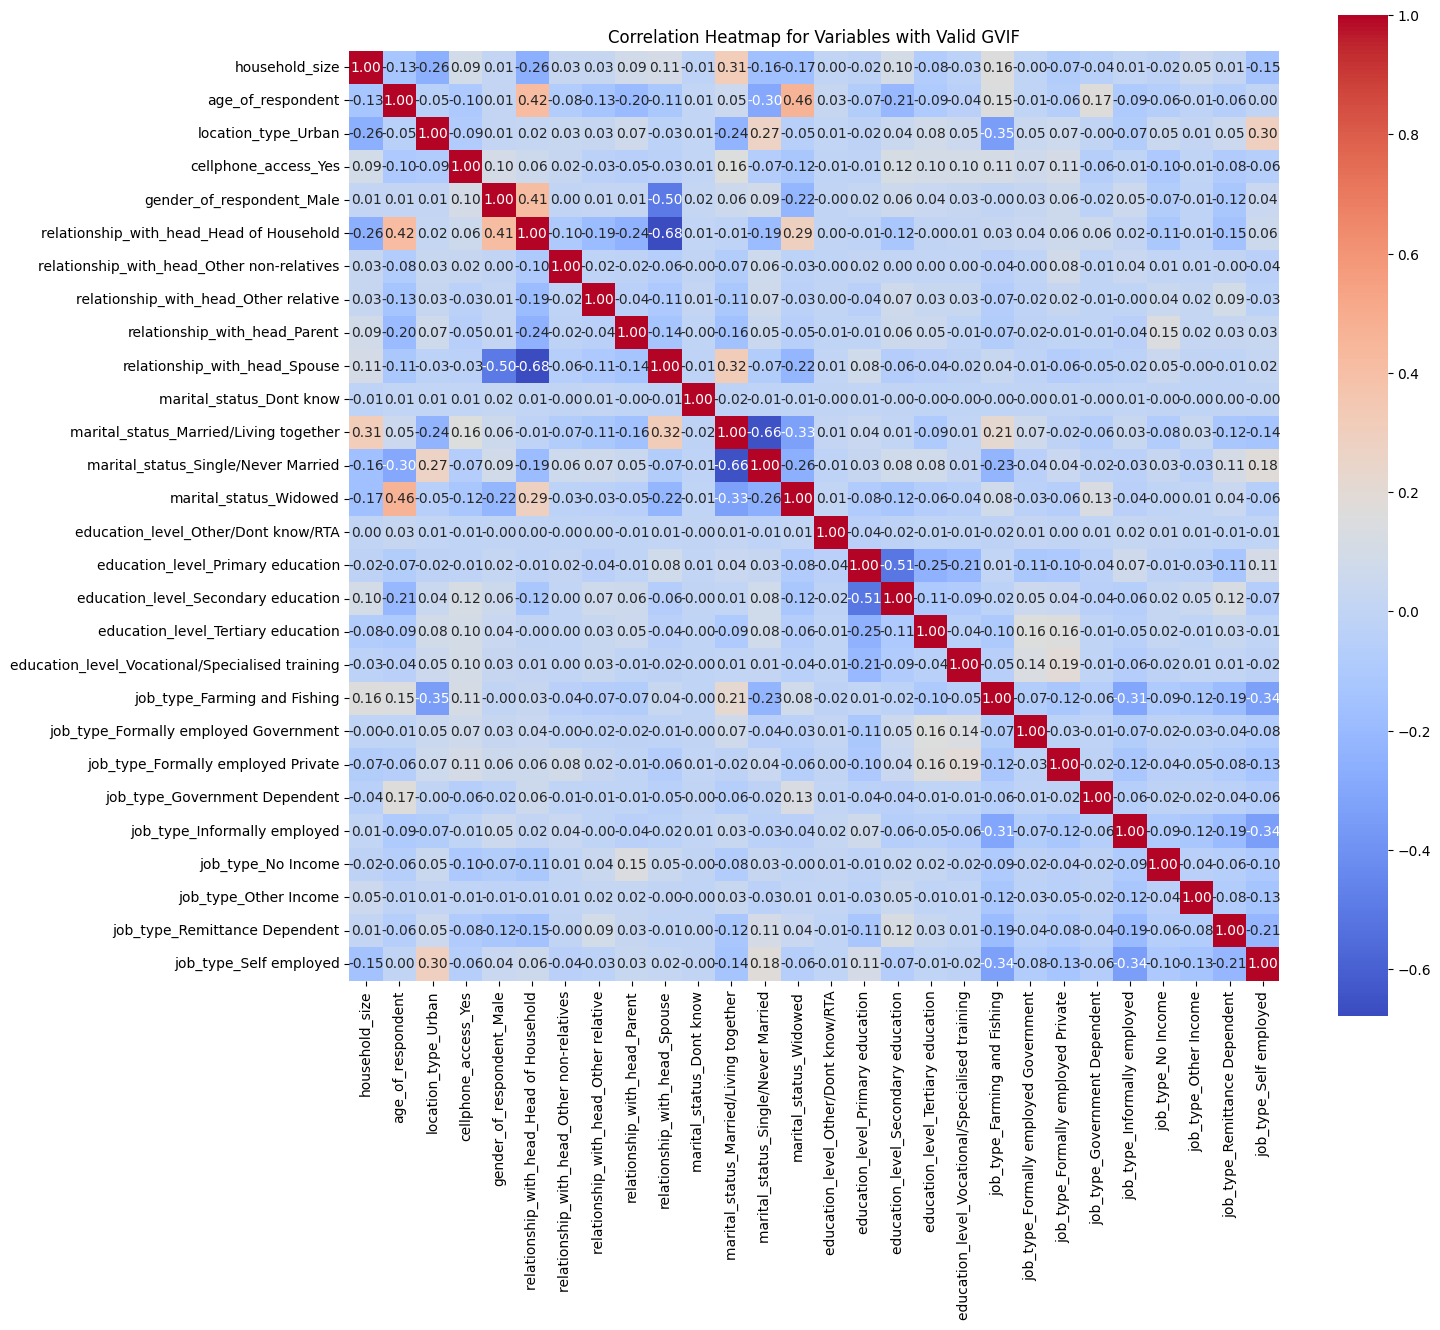

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Keep only GVIF rows with numeric values
gvif_clean = gvif_table.dropna(subset=['GVIF']).copy()

# 2. Get list of variable groups with valid GVIF
valid_vars = gvif_clean['Variable_Group'].tolist()

# 3. Select numeric columns corresponding to these variable groups
# (we select columns whose name contains any of the valid_vars prefixes)
numeric_cols = [
    col for col in train_df_encoded.select_dtypes(include=['number']).columns
    if any(col.startswith(var) for var in valid_vars)
]

# 4. Compute correlation matrix
corr_matrix = train_df_encoded[numeric_cols].corr()

# 5. Plot heatmap
plt.figure(figsize=(15,13))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True,
    square=True
)
plt.title("Correlation Heatmap for Variables with Valid GVIF")
plt.show()

- The correlation heatmap shows values ranging from -0.6 to 0.46, indicating that none of the variables are highly correlated.
- Since multicollinearity typically arises when correlations are very strong (close to ±1), these moderate correlations support the conclusion that multicollinearity is minimal in the dataset.

#### Feature Scaling

 - Feature scaling ensures that numerical features lie within a standardized range, preventing some features from dominating the learning process due to their larger values.

In [19]:
features = ['household_size', 'age_of_respondent']

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [34]:
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
# Define the variables
X = train_df_encoded.drop('bank_account_Yes', axis=1)
y = train_df_encoded['bank_account_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)


In [39]:
X_train_scaled.head()

,household_size,age_of_respondent,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,0.30,0.023810,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.10,0.392857,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.05,0.297619,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.20,0.107143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.30,0.357143,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [40]:
X_test_scaled.head()

,household_size,age_of_respondent,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,relationship_with_head_Parent,relationship_with_head_Spouse,...,education_level_Vocational/Specialised training,job_type_Farming and Fishing,job_type_Formally employed Government,job_type_Formally employed Private,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed
0,0.3,0.285714,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.1,0.095238,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1,0.107143,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.226190,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.1,0.523810,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 - The data sets (both the training and testing sets) are cleaned and preprocessed ready for modeling.

In [ ]:
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import joblib

In [ ]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numeric_cols),
#         ('cat', categorical_transformer, categorical_columns)
#     ]
# )

In [ ]:
# # Define pipeline
# pipe = Pipeline(steps=[
#     ('prep', preprocessor),
#     ('clf', LogisticRegression(max_iter=1000, random_state=42))
# ])

In [41]:
# pipe.fit(X_train, y_train)

In [ ]:
# y_pred = pipe.predict(X_test)

In [42]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
# print(f"Accuracy Score: {accuracy_score(y_pred, y_test)}")

In [43]:
# print("ROC AUC Score:", roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1]))

In [ ]:
# pipe_rf = Pipeline(steps = [
#     ('prep', preprocessor),
#     ('Classifier', RandomForestClassifier(n_estimators=100, random_state=42))
# ])

In [44]:
# pipe_rf.fit(X_train, y_train)

In [ ]:
# y_pred1 = pipe_rf.predict(X_test)

In [45]:
# print(f"Accuracy Score: {accuracy_score(y_pred1, y_test)}")

In [46]:
# print("ROC AUC Score:", roc_auc_score(y_test, pipe_rf.predict_proba(X_test)[:, 1]))

### Modeling

#### Single models

##### Logistic Regression Model

In [47]:
# Logistic Regression Model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [48]:
# Predict
y_pred = lr.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(4705,))

In [56]:
# Evaluate the model
print(f"Accuracy Score:\n {accuracy_score(y_pred, y_test)}")
print(f"ROC AUC Score:\n {roc_auc_score(y_pred, y_test)}")

Accuracy Score:
 0.8871413390010627
ROC AUC Score:
 0.797739938278412


 - ROC Curve is a graphical representation of a binary classification model for all classification thresholds. 

In [85]:
from sklearn.metrics import roc_curve
roc_auc_lr = roc_auc_score(y_test, y_pred)
print(f"\nROC AUC for Logistic Regression model: {roc_auc_lr:.4f}")


ROC AUC for Logistic Regression model: 0.6428


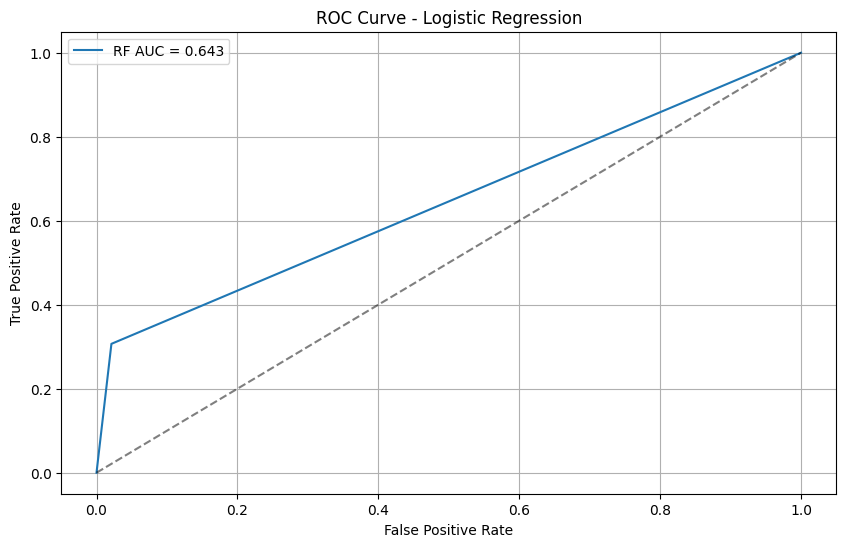

In [86]:
# ROC plot
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'RF AUC = {roc_auc_lr:.3f}')
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

 - An AUC score of around .5 would mean that the model is unable to make a distinction between the two classes and the curve would look like a line with a slope of 1. An AUC score closer to 1 means that the model has the ability to separate the two classes and the curve would come closer to the top left corner of the graph.

 - For this case, the model recorded an AUC of around 0.64, slightly above 0.5. This means that the model's ability to distinguish between the 2 claases was weak.

##### Random Forest Classifier

In [57]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [58]:
# Predict
y_pred1 = rf.predict(X_test_scaled)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], shape=(4705,))

In [59]:
# Evaluate the model
print(f"Accuracy Score:\n {accuracy_score(y_test, y_pred1)}")
print(f"ROC AUC Score:\n {roc_auc_score(y_test, y_pred1)}")

Accuracy Score:
 0.8556854410201913
ROC AUC Score:
 0.650204757928667


In [83]:
roc_auc_rf = roc_auc_score(y_test, y_pred1)
print(f"\nROC AUC for Random Forest model: {roc_auc_rf:.4f}")


ROC AUC for Random Forest model: 0.6502


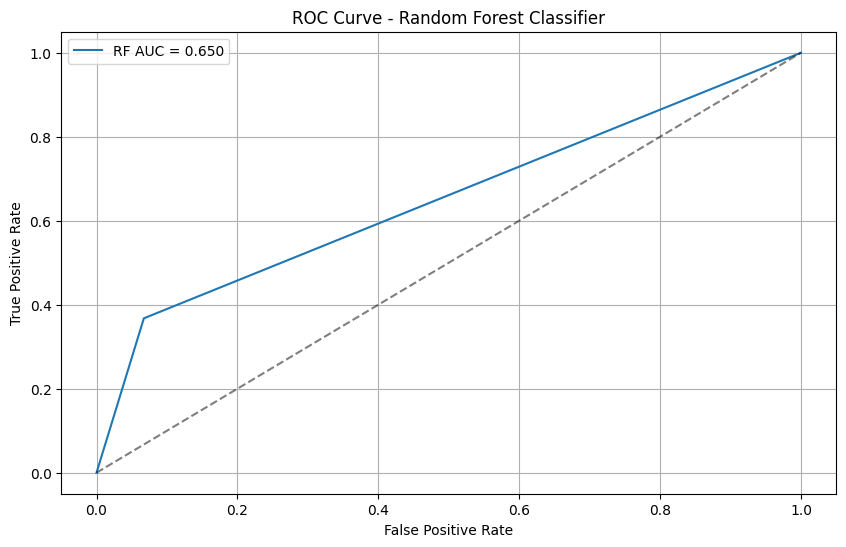

In [84]:
# ROC plot
fpr, tpr, _ = roc_curve(y_test, y_pred1)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'RF AUC = {roc_auc_rf:.3f}')
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()

 - Compared to the Logistic Regression model AUC scoore of 0.64, the Random forest Classifier recorded an AUC score of 0.65. Similarly, the Random Forest Claasifier also had a weak ability to distinguish between the 2 classes i.e. whether an individual has a bank account or not.

##### XGBoost 

In [62]:
from xgboost import XGBClassifier

In [63]:
xgb_model = XGBClassifier(
    n_estimators = 1000, learning_rate = 0.05,
    max_depth = 10, subsample = 0.8, colsample_bytree = 0.8,
    random_state = 42
)

In [64]:
xgb_model.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [65]:
# Predict
y_pred2 = xgb_model.predict(X_test_scaled)

In [66]:
# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_test, y_pred2)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred2)}")

Accuracy Score: 0.8680127523910733
ROC AUC Score: 0.6645556396413805


In [81]:
roc_auc_xgb = roc_auc_score(y_test, y_pred2)
print(f"\nROC AUC for XGB model: {roc_auc_xgb:.4f}")


ROC AUC for XGB model: 0.6646


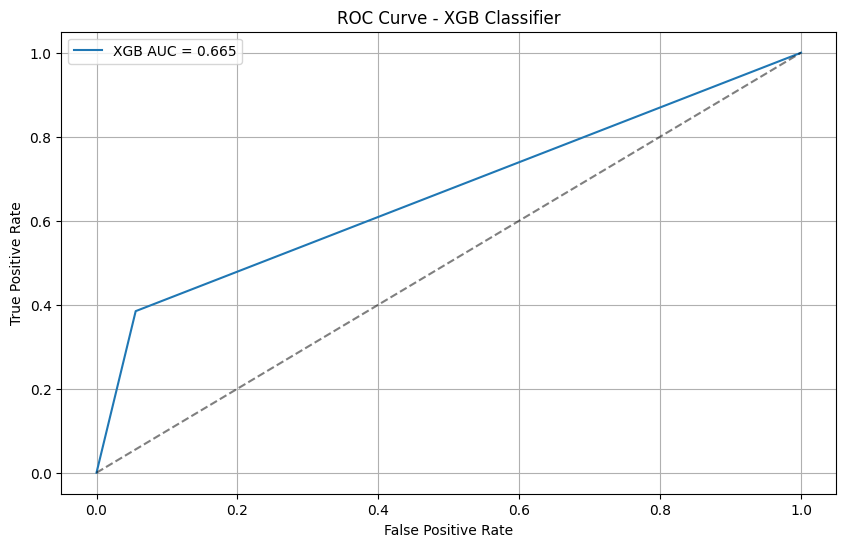

In [82]:
# ROC plot
fpr, tpr, _ = roc_curve(y_test, y_pred2)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'XGB AUC = {roc_auc_xgb:.3f}')
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGB Classifier')
plt.legend()
plt.grid(True)
plt.show()

 - Although the XGB Model's AUC score is still weak, showing a weak ability to distingush between an individual having a bank account or not, It performs better than Random Forest Classifier and Logistic Regression.

#### Feature Importance

 - Feature importances are provided by the feature_importances_ fitted attribute provides the feature importances, which are calculated as the standard deviation and mean of each tree’s decrease in impurity.

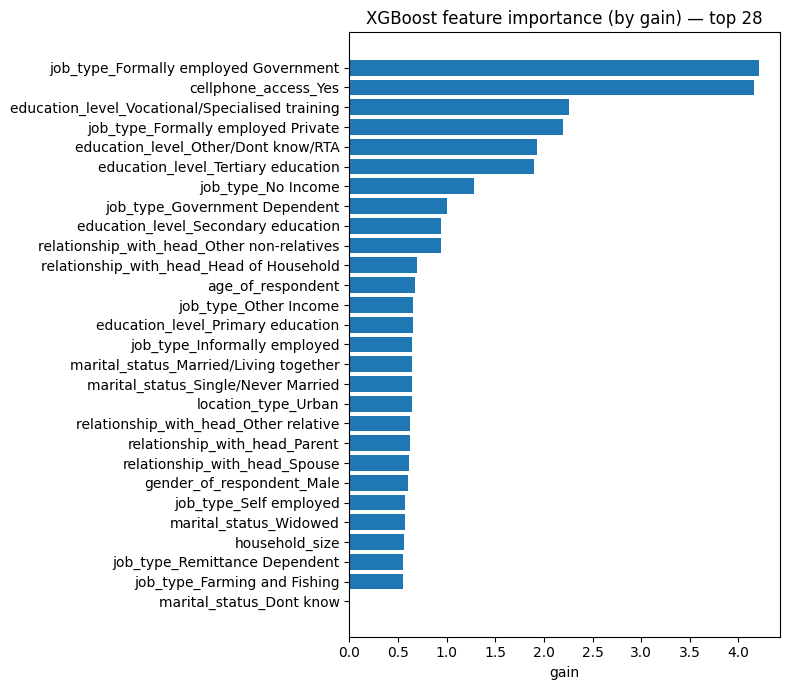

In [72]:
top_n = 28            # how many top features to show
importance_type = 'gain' 
model = xgb_model      # your trained XGBClassifier
X = X_train_scaled           # your training features as a pandas DataFrame

# get feature importances
booster = model.get_booster()
score_dict = booster.get_score(importance_type=importance_type) 

# align with feature names
feature_names = X.columns if hasattr(X, "columns") else model.get_booster().feature_names
scores = {fn: score_dict.get(fn, 0.0) for fn in feature_names}

# convert to DataFrame and sort
imp_df = pd.DataFrame.from_dict(scores, orient='index', columns=['importance'])
imp_df.index.name = 'feature'
imp_df = imp_df.reset_index().sort_values('importance', ascending=False).head(top_n)

# plot
plt.figure(figsize=(8, max(4, 0.25 * len(imp_df))))
plt.barh(imp_df['feature'][::-1], imp_df['importance'][::-1])
plt.xlabel(importance_type)
plt.title(f'XGBoost feature importance (by {importance_type}) — top {top_n}')
plt.tight_layout()
plt.show()

 The feature-importance plot shows that job type (especially formal government employment), cellphone access, and education level are the strongest predictors of whether someone has a bank account. These socioeconomic factors contribute the highest model gain, meaning they significantly improve XGBoost’s ability to classify individuals correctly. Lower-ranked variables such as gender, household size, and marital status still contribute but have much weaker predictive power.

#### Hybrid Models

##### Random Forest - Logistic Regression Model

 Approach in Brief.
 - Stacking hybrid - building a stacked classifier that uses Random Forest and Logistic Regression as base learners and a Logistic Regression as the meta (blender) model.

In [ ]:
# Stacking ensemble: RF and LR as base estimators, with LogisticRegression as meta-estimator
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [74]:
# Preprocessing pipeline for numeric features (scaling)
# preproc = Pipeline([('scaler', StandardScaler())])

# Define base estimators
rf_base = ('rf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
lr_base = ('lr', LogisticRegression(max_iter=2000, solver='lbfgs', random_state=42))

In [75]:

# Stacking classifier with LogisticRegression as final estimator
stack = StackingClassifier(
    estimators=[rf_base, lr_base],
    final_estimator=LogisticRegression(max_iter=2000, solver='lbfgs'),
    cv=5,
    n_jobs=-1,
    passthrough=False  # set True if you want original features concatenated to meta features
)

In [ ]:

# Full pipeline: stacking
pipeline = Pipeline([
    ('stack', stack)
])

In [77]:

# Cross-validated ROC-AUC
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print("Stacking CV ROC-AUC scores:", np.round(cv_scores, 4))
print("Mean CV ROC-AUC:", cv_scores.mean())

Stacking CV ROC-AUC scores: [0.8257 0.8446 0.8321 0.8496 0.8417]
Mean CV ROC-AUC: 0.8387545320549048


In [78]:

# Fit on full train set and evaluate on test
pipeline.fit(X_train_scaled, y_train)
y_proba_stack = pipeline.predict_proba(X_test_scaled)[:, 1]
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f"\nStacking model ROC-AUC on test set: {roc_auc_stack:.4f}")


Stacking model ROC-AUC on test set: 0.8417


 - RF and LR as base estimators and LR as the final estimator records an AUC score of ~0.84. This is a great improvement compared to the single models.

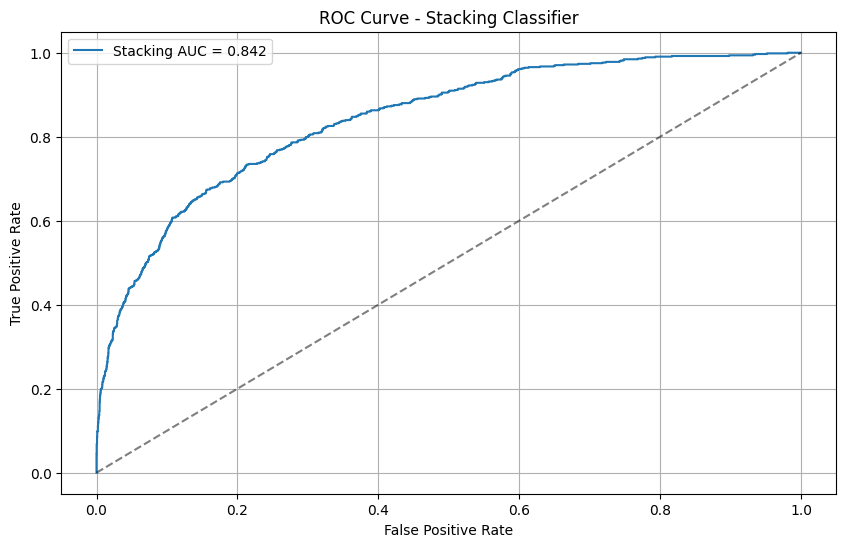

In [80]:

# ROC plot
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'Stacking AUC = {roc_auc_stack:.3f}')
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend()
plt.grid(True)
plt.show()


 - An AUC of 0.842 means the hybrid model can correctly distinguish bankers vs. non-bankers about 84% of the time, even under varying classification thresholds.
 - This indicates a strong predictive performance, showing that the model reliably ranks positive cases higher than negative ones.

Note:
Why Stacking is most preferred here - it blends complementary strengths i.e. RF captures nonlinearities and interactions, LR gives a well-calibrated linear signal; the meta-learner learns how to combine them to improve predictive performance.

#### SVM - XGBoost Hybrid Model

In [88]:
# Stacking SVM + XGBoost (SVM and XGB as base, LR meta)
# StackingClassifier with SVM + XGBoost base learners
from sklearn.svm import SVC

In [89]:
# Base learners
svm_base = ('svm', SVC(kernel='rbf', probability=True, C=1.0, gamma='scale', random_state=42))
xgb_base = ('xgb', XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=5,
                                 subsample=0.8, colsample_bytree=0.8, random_state=42,
                                 use_label_encoder=False, eval_metric='logloss'))

In [90]:

# Stacking classifier
stack = StackingClassifier(
    estimators=[svm_base, xgb_base],
    final_estimator=LogisticRegression(max_iter=2000),
    cv=5,
    n_jobs=-1,
    passthrough=False  # set True to also provide original features to meta learner
)

In [91]:

# Full pipeline: stacking and scaling (SVM needs scaling)
pipeline = Pipeline([
    ('stack', stack)
])

# Cross-validated ROC-AUC (on train)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipeline, X_train_scaled, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print("Stacking CV ROC-AUC:", np.round(cv_scores, 4), " Mean:", cv_scores.mean())

Stacking CV ROC-AUC: [0.8349 0.8451 0.8417 0.8563 0.8453]  Mean: 0.8446716653453678


In [ ]:

# Fit and evaluate on test set
pipeline.fit(X_train_scaled, y_train)
y_proba = pipeline.predict_proba(X_test_scaled)[:, 1]
print("Stacking test ROC-AUC:", roc_auc_score(y_test, y_proba))

Stacking test ROC-AUC: 0.8542402257896081


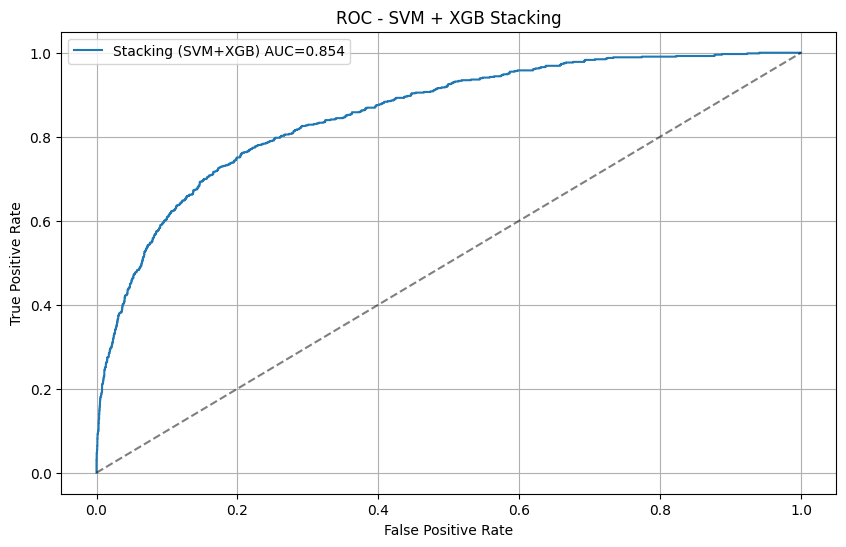

In [95]:

# ROC plot
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label=f'Stacking (SVM+XGB) AUC={roc_auc_score(y_test,y_proba):.3f}')
plt.plot([0,1],[0,1],'k--', alpha=0.5)
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC - SVM + XGB Stacking'); plt.legend(); plt.grid(True); plt.show()

The SVM-XGBoost Hybrid model recorded an AUC of 0.854, which is an improvement from the AUC recorded by the RF-Logistic regression hybrid model.
This shows how powerful the combination of  SVM+XGB is in classifying whether an individual has a bank account or not.